## CAT classifier using deep neural network

#### Import the packages need for image-recognition 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

%matplotlib inline

#### Load the dataset

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

AxesImage(54,36;334.8x217.44)
(209, 64, 64, 3)


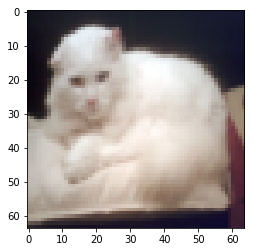

In [3]:
#view the dataset
c = 13
cat = train_set_x_orig[c]
print(plt.imshow(cat))
print(train_set_x_orig.shape)

AxesImage(54,36;334.8x217.44)


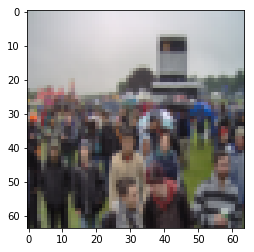

In [4]:
nc = 100
non_cat = train_set_x_orig[nc]
print(plt.imshow(non_cat))

In [5]:
#unroll the data from 64,64, 3 to (64 * 64 * 3), 1
X_train = train_set_x_orig.reshape(209,64 * 64 * 3)
X_test  = test_set_x_orig.reshape(50,64*64*3)

X_train = X_train.T
Y_train = train_set_y
X_test  = X_test.T

#normalize the data
X_train = X_train / (np.max(X_train, axis = 0))


X_test  = X_test / (np.max(X_test, axis = 0))
Y_test  = test_set_y
print(X_train.shape,Y_train.shape)

m = 16
feature = 12288
tf.reset_default_graph()

(12288, 209) (1, 209)


#### Create the placeholder for input and output 

In [119]:
X = tf.placeholder(tf.float32,shape = [feature,None], name = 'Input')
Y = tf.placeholder(tf.float32, shape = [1,None], name = 'Output')

deep_layer = 2
node_layer = [4, 1]

W1 = tf.Variable(tf.random_normal([50,feature], seed = 1)* .001, tf.float32, name = 'Weight_layer_1')
b1 = tf.Variable(tf.random_normal([50,1], seed = 1)* .001, tf.float32, name = 'bias_layer_1')

W2 = tf.Variable(tf.random_uniform([10,50],seed = 1) * .1, tf.float32, name = 'Weigth_layer_2')
b2 = tf.Variable(tf.random_uniform([10,1], seed = 1) * 0.1, tf.float32, name = 'bias_layer_2')

W3 = tf.Variable(tf.random_normal([4,10], seed = 2) * .1, tf.float32 , name = 'Weight_layer_3')
b3 = tf.Variable(tf.random_normal([4,1], seed = 2) * 0.1 , tf.float32, name = 'bias_layer_3')

W4 = tf.Variable(tf.random_uniform([1,4], seed = 3) * .1, tf.float32 , name = 'Weight_layer_4')
b4 = tf.Variable(tf.random_uniform([1,1], seed = 3)* 0.1 , tf.float32, name = 'bias_layer_4')

#### Calculate the forward and backward propagation

In [120]:
#Forward propagation
A0 = X

Z1 = tf.matmul(W1 , A0) + b1
A1 = tf.tanh(Z1)

Z2 = tf.matmul(W2, A1) +  b2
A2 = tf.tanh(Z2)

Z3 = tf.matmul(W3, A2) + b3
A3 = tf.tanh(Z3)

Z4 = tf.matmul(W4, A3) + b4
A4 = tf.sigmoid(Z4)

#Backward propagation

DZ4 = tf.subtract(A4, Y)
DW4 = tf.matmul(DZ4, tf.transpose(A3)) / (m)
DB4 = tf.reduce_sum(DZ4, axis = 1, keep_dims = True) / (m)

DA3 = tf.matmul(tf.transpose(W4), DZ4)
DZ3 = tf.multiply(DA3, (1 - tf.square(A3))) 
DW3 = tf.matmul(DZ3, tf.transpose(A2)) / (m)
DB3 = tf.reduce_sum(DZ3, axis = 1, keep_dims = True) / (m)

DA2 = tf.matmul(tf.transpose(W3), DZ3 )
DZ2 = tf.multiply(DA2, (1 - tf.square(A2)))
DW2 = tf.matmul(DZ2, tf.transpose(A1)) / (m)
DB2 = tf.reduce_sum(DZ2, axis = 1, keep_dims = True) / (m)

DA1 = tf.matmul(tf.transpose(W2), DZ2)
DZ1 = tf.multiply(DA1, (1 - tf.square(A1)))
DW1 = tf.matmul(DZ1, tf.transpose(A0)) / (m)
DB1 = tf.reduce_sum(DZ1, axis = 1, keep_dims = True) / (m)

In [141]:
epoch = 1500
batch_size = 32
batch_iteration = 6

learning_rate = tf.constant(.001, name = 'learning_rate')

iteration_cost = []
cost =tf.reduce_sum(Y * tf.log(A4) + (1 - Y) * tf.log(1 - A4)) * (-1)


assign_w1     = W1.assign_sub(learning_rate * DW1)

assign_b1     = b1.assign_sub(learning_rate * DB1)

assign_w2     = W2.assign_sub(learning_rate * DW2)

assign_b2     = b2.assign_sub(learning_rate * DB2)

assign_w3     = W3.assign_sub(learning_rate * DW3)

assign_b3     = b3.assign_sub(learning_rate * DB3)

assign_w4     = W4.assign_sub(learning_rate * DW4)

assign_b4     = b4.assign_sub(learning_rate * DB4)     

init = tf.global_variables_initializer()

#### Train our model 

In [142]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):  
        for j in range(batch_iteration):
            sess.run([assign_w4, assign_b4,assign_w3, assign_b3, assign_w2, assign_b2, assign_w1, assign_b1], {X:X_train[:,j*batch_size:(j+1)* batch_size], Y:Y_train[:,j*batch_size:(j+1)*batch_size]})
            iteration_cost.append(sess.run(cost, {X:X_train[:,j*batch_size:(j+1)*batch_size], Y:Y_train[:,j*batch_size:(j+1)*batch_size]}))
        sess.run([assign_w4, assign_b4,assign_w3, assign_b3, assign_w2, assign_b2, assign_w1, assign_b1], {X:X_train[:,198:], Y:Y_train[:,198:]})
        iteration_cost.append(sess.run(cost, {X:X_train[:,198:], Y:Y_train[:,198:]}))
        
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()
    w_4 = W4.eval()
    b_4 = b4.eval()

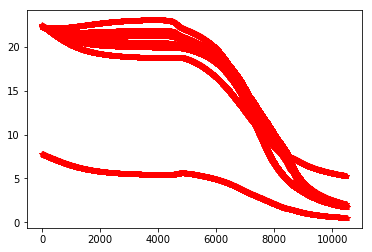

In [143]:
plt.plot(iteration_cost, 'r*')

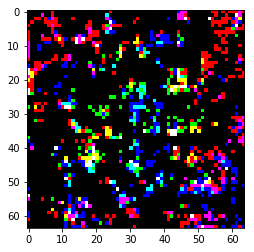

In [195]:
#visualize the value of W, it most look like cat
w_int = [int(i*400) for i in w_1[3,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

In [147]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

a = np.array([-1, -0.5, 0, 0.5, 1])
sigmoid(a)
tanh(a)

array([-0.76159416, -0.46211716,  0.        ,  0.46211716,  0.76159416])

In [193]:
#Train accuracy
correct_no_train = 0
total_no_train = 0
for i in range(209):
    #Forward propagation
    A_0 = np.array(X_train[:,i]).reshape(12288,1)

    Z_1 = np.dot(w_1, A_0) + b_1
    A_1 = tanh(Z_1)

    Z_2 = np.dot(w_2, A_1) +  b_2
    A_2 = tanh(Z_2)
    
    Z_3 = np.dot(w_3, A_2) + b_3
    A_3 = tanh(Z_3)
    
    Z_4 = np.dot(w_4, A_3) + b_4
    A_4 = sigmoid(Z_4)
    if (np.abs(A_4 - Y_train[:,i]) < 0.5):
        correct_no_train += 1
    total_no_train += 1

print(correct_no_train / total_no_train)

0.9808612440191388


In [192]:
#Test accuracy
correct_no_test = 0
total_no_test = 0
for i in range(50):
    #Forward propagation
    A_0 = np.array(X_test[:,i]).reshape(12288,1)

    Z_1 = np.dot(w_1 , A_0) + b_1
    A_1 = tanh(Z_1)

    Z_2 = np.dot(w_2, A_1) +  b_2
    A_2 = tanh(Z_2)
    
    Z_3 = np.dot(w_3, A_2) + b_3
    A_3 = tanh(Z_3)
    
    Z_4 = np.dot(w_4,A_3) + b_4
    A_4 = sigmoid(Z_4)
    
    if (np.abs(A_4 - Y_test[:,i]) < 0.5):
        correct_no_test += 1
    total_no_test += 1

print(correct_no_test / total_no_test)

0.76


In [191]:
print("Training accuracy is " , correct_no_train / total_no_train , " and the testing accuracy is ", correct_no_test / total_no_test)

Training accuracy is  0.9808612440191388  and the testing accuracy is  0.76
